# Problem Set 3

## Directions

1. Show all work/steps/calculations using a combination of code and Markdown. You will submit only this notebook named: [jhed_id].ipynb back to Blackboard from whence you downloaded it. Do not return the data to me.
2. **All** work is to be your own. This is not a group project. You may, however, use code from the lectures and labs. Provide citations for any code that is not your own. You may also consult Stackoverflow, etc. This is not by any means "closed book" or anything like that. Basically, I need to see if *you* learned the concepts from the Lectures, *Fundamentals*, and Labs.
3. Add whatever markdown or code cells you need in each part to explain and calculate your answers. Don't just provide answers but explain them as well. **Explain and interpret your results.**

## Abalone

This is a problem about Abalone...but not really. You should be able to use common knowledge to work with the data in this problem.

```
Description of fields in abalone data.

Name            Data Type    Meas.    Description
----            ---------    -----    -----------
Sex             nominal               M, F, and I (infant)
Length          continuous    mm      Longest shell measurement
Diameter        continuous    mm      perpendicular to length
Height          continuous    mm      with meat in shell
Whole weight    continuous    grams   whole abalone
Shucked weight  continuous    grams   weight of meat
Viscera weight  continuous    grams   gut weight (after bleeding)
Shell weight    continuous    grams   after being dried
Rings           integer               +1.5 gives the age in years
```

The target variable is Rings because it is a predictor of age. You can take this as your problem, "How do we estimate the age of an abalone from the available data?"

At a high level you have:

1. Question/Problem
2. ETL
3. EDA
4. Statistical and Mathematical Modeling.

Of necessity, there is very little ETL here except to verify that the data has loaded correctly and with the correct types. For the EDA and Modeling parts, follow the guidelines in *Fundamentals*.


**Begin**

## Problem Statement
We are interested in how Abalone age is related to, and can be predicted by, 8 other variables. Abalones are a type of shellfish, and their age can be measured by the number of rings +1.5. 

## ETL

In [66]:
%matplotlib inline

import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn import linear_model

sns.set(style="whitegrid")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 200)

In [5]:
abalone = pd.read_csv('abalone.original.csv',names = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])

In [6]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,91,73,19,102.8,44.9,20.2,30.0,15
1,M,70,53,18,45.1,19.9,9.7,14.0,7
2,F,106,84,27,135.4,51.3,28.3,42.0,9
3,M,88,73,25,103.2,43.1,22.8,31.0,10
4,I,66,51,16,41.0,17.9,7.9,11.0,7


In [9]:
abalone.shape

(4177, 9)

In [10]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null int64
Diameter          4177 non-null int64
Height            4177 non-null int64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(4), int64(4), object(1)
memory usage: 293.8+ KB


It looks like there are 4177 observations in this dataset, with 1 categorical predictor, 3 integer predictors, 4 decimal predictors, and 1 integer response. None of the values appear to be null. 

## EDA

In [11]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,104.798420,81.576251,27.903280,165.748432,71.873498,36.118722,47.766172,9.933684
std,24.018583,19.847973,8.365411,98.077804,44.392590,21.922850,27.840534,3.224169
min,15.000000,11.000000,0.000000,0.400000,0.200000,0.100000,0.300000,1.000000
25%,90.000000,70.000000,23.000000,88.300000,37.200000,18.700000,26.000000,8.000000
50%,109.000000,85.000000,28.000000,159.900000,67.200000,34.200000,46.800000,9.000000
75%,123.000000,96.000000,33.000000,230.600000,100.400000,50.600000,65.800000,11.000000
max,163.000000,130.000000,226.000000,565.100000,297.600000,152.000000,201.000000,29.000000


We can see that the average number of rings is 9.93, while the max is 29. Interestingly, the min is not 0, but 1, meaning that the youngest abalone in this dataset is 2.5 years old. Another interesting thing is that the min for height is 0, which doesn't seem correct. This is something interesting. All of the other values are within expectations, although it seems like there are some big abalones out there.

In [12]:
abalone.loc[abalone['Height'] == 0,:]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,86,68,0,85.6,41.3,17.2,23.0,8
3996,I,63,46,0,26.8,11.5,5.7,70.1,6


Based on this, it definitely looks like that the Height is an erroneous value, since these are not the smallest abalones and definitely do not seem like they should have a height of 0.

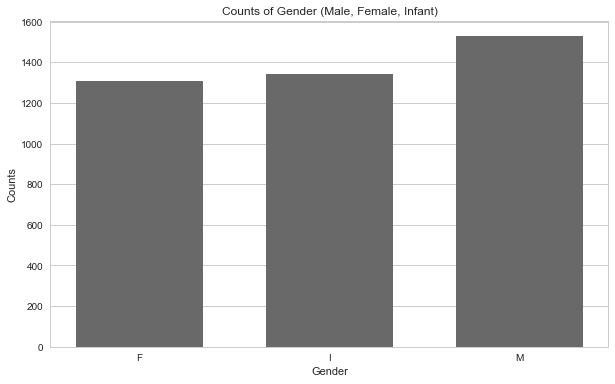

In [18]:
counts = abalone.Sex.value_counts().sort_index()
x = range( len( counts))
width = 1/1.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, counts, width, color="dimgray", align="center")
axes.set_xticks(x)
axes.set_xticklabels(counts.axes[0])
axes.set_title( "Counts of Gender (Male, Female, Infant)")
axes.set_xlabel("Gender")
axes.set_ylabel( "Counts")
axes.xaxis.grid(False)

plt.show()
plt.close()

In [64]:
abalone.groupby('Sex',as_index=False).agg({'Rings':['min','mean','median','max']})

Sex Rings                      
        min       mean median max
0   F     5  11.129304     10  29
1   I     1   7.890462      8  21
2   M     3  10.705497     10  27

It seems that there is slightly more males than infants or females. There are more infants that I expected. In addition, it seems very likely that in this dataset, the males, inftants, and Females have different numbers of rings. 

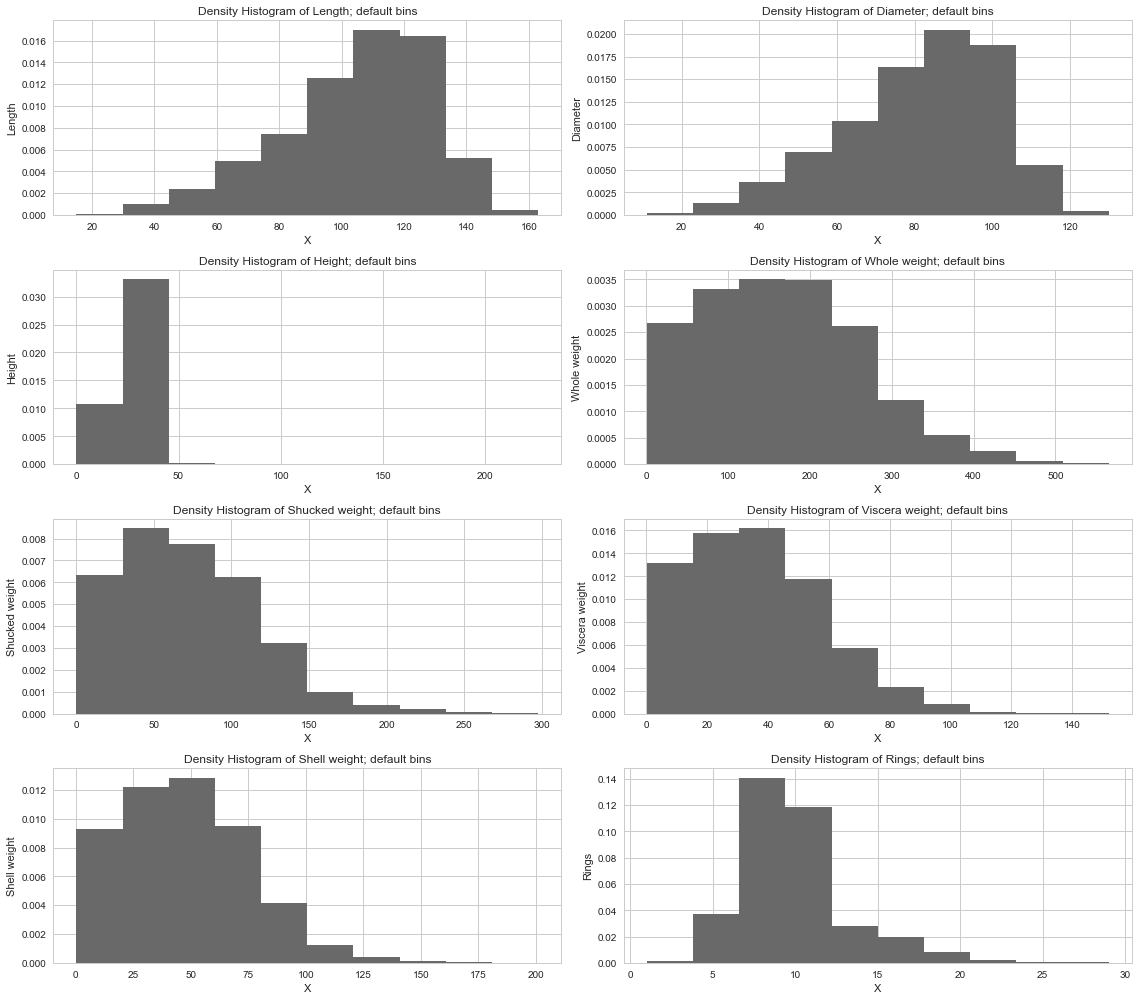

In [25]:
figure = plt.figure(figsize=(16, 14))
names = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
for i in range(len(names)):
    axes = figure.add_subplot(4, 2, i+1)

    axes.hist( abalone[names[i]], density=True, color="DimGray")
    axes.set_ylabel( names[i])
    axes.set_xlabel( "X")
    axes.set_title("Density Histogram of " + names[i] + "; default bins")

plt.tight_layout()
plt.show()
plt.close()

Length and Diameter seems slightly right skewed, Height seems to be centered <50 with some seemingly very large outliers, the 4 weight variables seem to the all left skewed. The number of rings seem slightly left skewed, but seems slightly more symmetrical than the weight variables. 

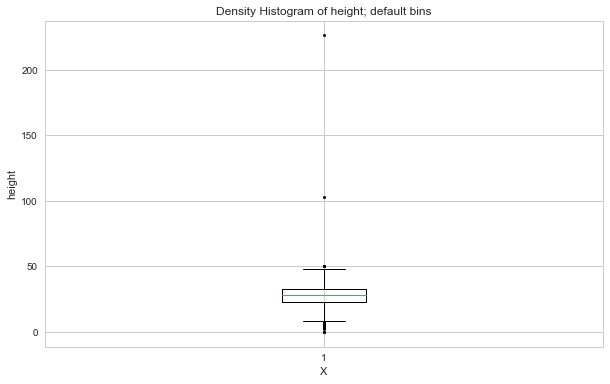

In [32]:
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)

axes.boxplot( abalone['Height'], sym='k.')
axes.set_ylabel( "height")
axes.set_xlabel( "X")
axes.set_title("Density Histogram of height; default bins")
plt.show()
plt.close()

In [30]:
abalone.loc[abalone['Height'] > 50,:]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1417,M,141,113,103,442.0,221.5,97.3,102.4,10
2051,F,91,71,226,118.8,66.4,23.2,26.7,8


The boxplot shows that there are two significant outliers, one at 103 and the other at 226. While the 103 one seems to be in line with what its weight tells us, the one at 226 seems to be an error. Perhaps it was meant to be 26, as its weight is about 1/4 the one at height 103. 

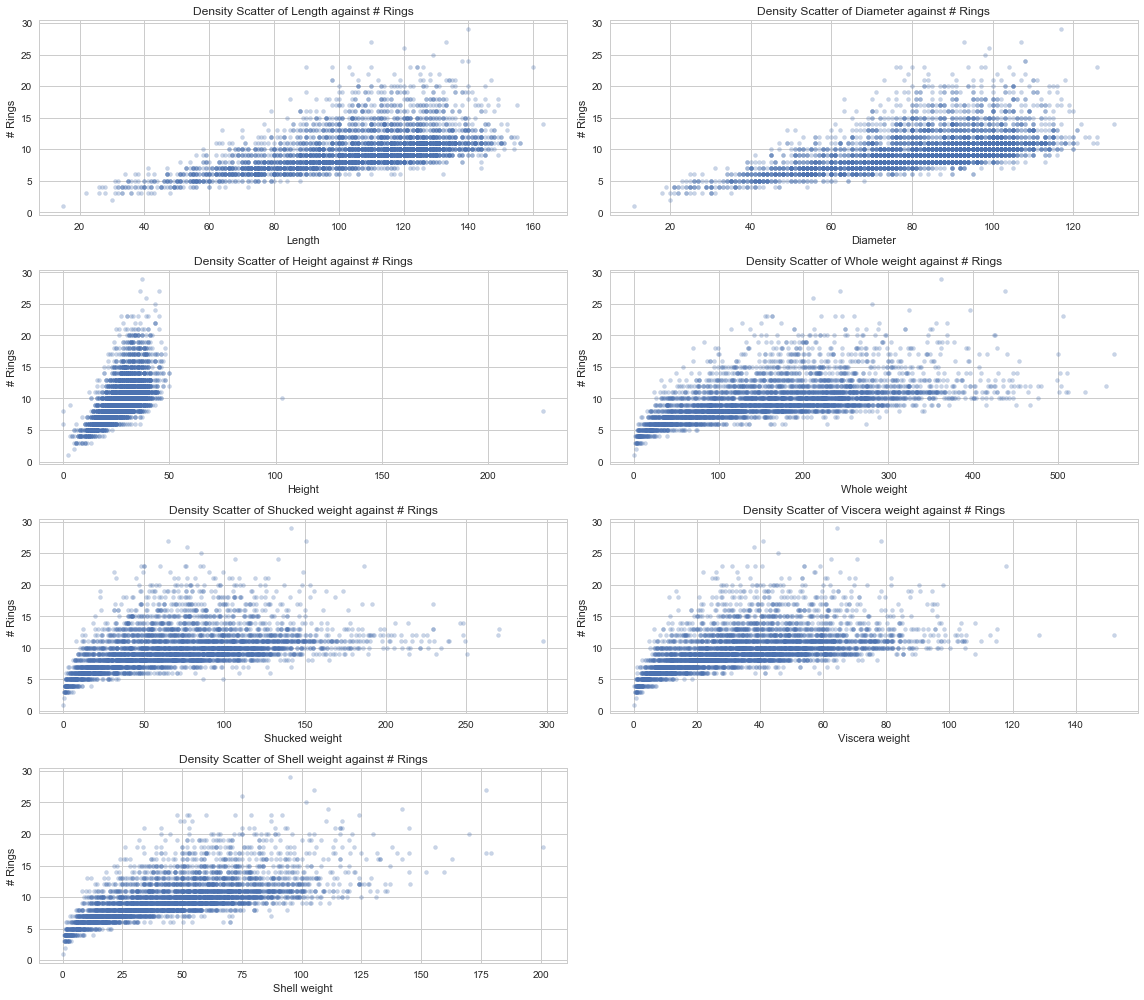

In [44]:
figure = plt.figure(figsize=(16, 14))
for i in range(len(names)-1):
    axes = figure.add_subplot(4, 2, i+1)

    axes.scatter( abalone[names[i]],abalone['Rings'], alpha = .3,s=16)
    axes.set_ylabel( "# Rings")
    axes.set_xlabel( names[i])
    axes.set_title("Density Scatter of " + names[i] + " against # Rings")

plt.tight_layout()
plt.show()
plt.close()

There seems to a roughly linear relationship between all of the variables and number of rings. Length and Diameter seem to have a decently linear relationship, and Height would as well if it wasn't for those outliers. The weight variables seem to have maybe a not quite linear relationship with # Rings. 

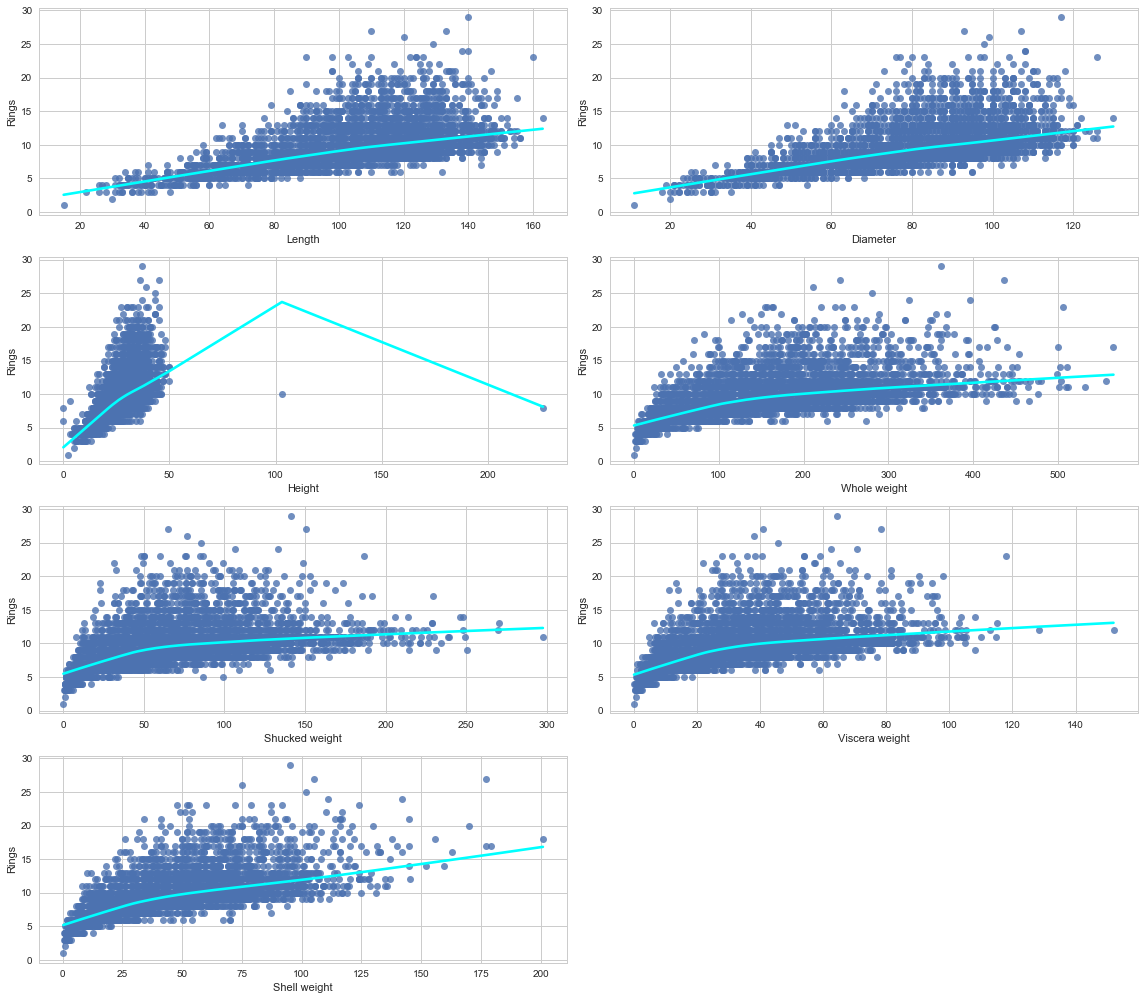

In [53]:
figure = plt.figure(figsize=(16, 14))
for i in range(len(names)-1):
    axes = figure.add_subplot(4, 2, i+1)
    sns.regplot( abalone[names[i]],abalone['Rings'], lowess=True,line_kws={'color':'cyan'})
plt.tight_layout()
plt.show()
plt.close()

We can see that the lowess lines in the earlier parts of the weight variables are different from the later parts of the weight variables. The Height one really gives some weight to removing that one point at 226, but I think we'll keep it in and make a not of it for now.

## Statistical and Mathematical Modeling

In [77]:
predictors = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']
for i in range(len(predictors)):
    print(predictors[i])
    X = abalone[predictors[i]]
    X = sm.add_constant(X)
    model = sm.OLS(abalone['Rings'],X).fit()
    display(model.summary())

Length


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     1875.
Date:                Sun, 21 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:30:25   Log-Likelihood:                -10042.
No. Observations:                4177   AIC:                         2.009e+04
Df Residuals:                    4175   BIC:                         2.010e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1019      0.186     11.328      0.000       1.738       2.466
Length         0.0747      0.002     43.303      0.000       0.071       0.078
==============================================================================
Omnibus:                     1410.473   Durbin-Watson:                   0.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4672.802
Skew:                           1.713   Prob(JB):                         0.00
Kurtosis:                       6.887   Cond. No.                         481.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Diameter


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     2059.
Date:                Sun, 21 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:30:25   Log-Likelihood:                -9979.2
No. Observations:                4177   AIC:                         1.996e+04
Df Residuals:                    4175   BIC:                         1.998e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3186      0.173     13.423      0.000       1.980       2.657
Diameter       0.0933      0.002     45.371      0.000       0.089       0.097
==============================================================================
Omnibus:                     1414.851   Durbin-Watson:                   0.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4737.552
Skew:                           1.714   Prob(JB):                         0.00
Kurtosis:                       6.933   Cond. No.                         355.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Height


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     1882.
Date:                Sun, 21 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:30:25   Log-Likelihood:                -10039.
No. Observations:                4177   AIC:                         2.008e+04
Df Residuals:                    4175   BIC:                         2.009e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9385      0.144     27.302      0.000       3.656       4.221
Height         0.2149      0.005     43.388      0.000       0.205       0.225
==============================================================================
Omnibus:                     1152.248   Durbin-Watson:                   1.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80909.975
Skew:                           0.369   Prob(JB):                         0.00
Kurtosis:                      24.549   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Whole weight


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     1722.
Date:                Sun, 21 Jul 2019   Prob (F-statistic):          1.89e-315
Time:                        23:30:25   Log-Likelihood:                -10095.
No. Observations:                4177   AIC:                         2.019e+04
Df Residuals:                    4175   BIC:                         2.021e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.9892      0.082     84.776      0.000       6.828       7.151
Whole weight     0.0178      0.000     41.498      0.000       0.017       0.019
==============================================================================
Omnibus:                     1236.821   Durbin-Watson:                   0.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3578.370
Skew:                           1.546   Prob(JB):                         0.00
Kurtosis:                       6.317   Cond. No.                         378.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Shucked weight


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     898.8
Date:                Sun, 21 Jul 2019   Prob (F-statistic):          5.09e-179
Time:                        23:30:25   Log-Likelihood:                -10409.
No. Observations:                4177   AIC:                         2.082e+04
Df Residuals:                    4175   BIC:                         2.083e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.7366      0.086     89.822      0.000       7.568       7.906
Shucked weight     0.0306      0.001     29.980      0.000       0.029       0.033
==============================================================================
Omnibus:                     1251.875   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3592.486
Skew:                           1.570   Prob(JB):                         0.00
Kurtosis:                       6.283   Cond. No.                         161.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Viscera weight


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     1420.
Date:                Sun, 21 Jul 2019   Prob (F-statistic):          8.57e-268
Time:                        23:30:25   Log-Likelihood:                -10205.
No. Observations:                4177   AIC:                         2.041e+04
Df Residuals:                    4175   BIC:                         2.043e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.2574      0.083     87.367      0.000       7.095       7.420
Viscera weight     0.0741      0.002     37.686      0.000       0.070       0.078
==============================================================================
Omnibus:                     1317.583   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4151.093
Skew:                           1.613   Prob(JB):                         0.00
Kurtosis:                       6.667   Cond. No.                         81.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Shell weight


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     2713.
Date:                Sun, 21 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:30:25   Log-Likelihood:                -9770.8
No. Observations:                4177   AIC:                         1.955e+04
Df Residuals:                    4175   BIC:                         1.956e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.4621      0.077     83.764      0.000       6.311       6.613
Shell weight     0.0727      0.001     52.084      0.000       0.070       0.075
==============================================================================
Omnibus:                     1213.646   Durbin-Watson:                   1.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3601.423
Skew:                           1.503   Prob(JB):                         0.00
Kurtosis:                       6.414   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
F,p = stats.f_oneway(abalone.loc[abalone['Sex'] == 'M','Rings'],
                    abalone.loc[abalone['Sex'] == 'F','Rings'],
                    abalone.loc[abalone['Sex'] == 'I','Rings'])
display(F,p)

499.33254468883234

3.724620497195191e-195

On a simple single-variate analysis, it seems that all of the continuous variables have a p-value <.01 against the response variable Rings, which means that they are statistically significantly linearly related to Rings. However, I can imagine that there are a lot of highly correlated variables amongst the predictors, since as the different weight variables. The means are also statistically significantly different for each of the different genders. 

In [65]:
corr = abalone.corr()
corr.style.background_gradient(cmap='coolwarm')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.55672
Diameter,0.986812,1,0.833684,0.925452,0.893162,0.899724,0.90533,0.57466
Height,0.827554,0.833684,1,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1,0.969405,0.966375,0.955355,0.54039
Shucked weight,0.897914,0.893162,0.774972,0.969405,1,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1,0.907656,0.503819
Shell weight,0.897706,0.90533,0.817338,0.955355,0.882617,0.907656,1,0.627574
Rings,0.55672,0.57466,0.557467,0.54039,0.420884,0.503819,0.627574,1


As we can see, it seems that there are indeed a lot of highly correlated variables. It seems the length and diameter are highly correlated, and the weight variables are also highly correlated like we had thought.

In [94]:
X = abalone.loc[:,'Length':'Shell weight']
y = abalone['Rings']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     665.2
Date:                Sun, 21 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:45:11   Log-Likelihood:                -9250.0
No. Observations:                4177   AIC:                         1.852e+04
Df Residuals:                    4169   BIC:                         1.857e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.9852      0.269     11.092      0.000       2.458       3.513
Length            -0.0079      0.009     -0.861      0.389      -0.026       0.010
Diameter           0.0668      0.011      5.972      0.000       0.045       0.089
Height             0.0591      0.008      7.639      0.000       0.044       0.074
Whole weight       0.0462      0.004     12.622      0.000       0.039       0.053
Shucked weight    -0.1011      0.004    -24.552      0.000      -0.109      -0.093
Viscera weight    -0.0491      0.007     -7.538      0.000      -0.062      -0.036
Shell weight       0.0429      0.006      7.545      0.000       0.032       0.054
==============================================================================
Omnibus:                      933.799   Durbin-Watson:                   1.387
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2602.745
Skew:                           1.174   Prob(JB):                         0.00
Kurtosis:                       6.072   Cond. No.                     2.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Surprisingly, all of the weight variables are still significant even though we added them all in. However, it seems like Length is now not a great predictor when we include all of the other variables. 

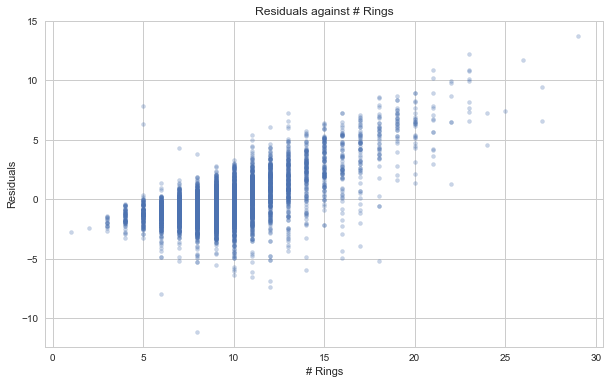

In [95]:
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)

axes.scatter( abalone['Rings'],model.resid, alpha = .3,s=16)
axes.set_ylabel( "Residuals")
axes.set_xlabel( "# Rings")
axes.set_title("Residuals against # Rings")

plt.show()
plt.close()

Based on the residuals plot, it does not look like there is an even distribution of residuals above and below 0. It seems like the model is slightly skewed, which means that a linear fit as is might not be the best way to model the data.

gender: F


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     103.1
Date:                Sun, 21 Jul 2019   Prob (F-statistic):          5.30e-120
Time:                        23:45:33   Log-Likelihood:                -3045.7
No. Observations:                1307   AIC:                             6107.
Df Residuals:                    1299   BIC:                             6149.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.0588      0.905      8.902      0.000       6.283       9.835
Length            -0.0432      0.018     -2.371      0.018      -0.079      -0.007
Diameter           0.0619      0.022      2.878      0.004       0.020       0.104
Height             0.0186      0.011      1.727      0.084      -0.003       0.040
Whole weight       0.0533      0.006      8.348      0.000       0.041       0.066
Shucked weight    -0.1061      0.007    -14.343      0.000      -0.121      -0.092
Viscera weight    -0.0440      0.011     -3.974      0.000      -0.066      -0.022
Shell weight       0.0362      0.010      3.653      0.000       0.017       0.056
==============================================================================
Omnibus:                      271.332   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              596.069
Skew:                           1.159   Prob(JB):                    3.68e-130
Kurtosis:                       5.361   Cond. No.                     3.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

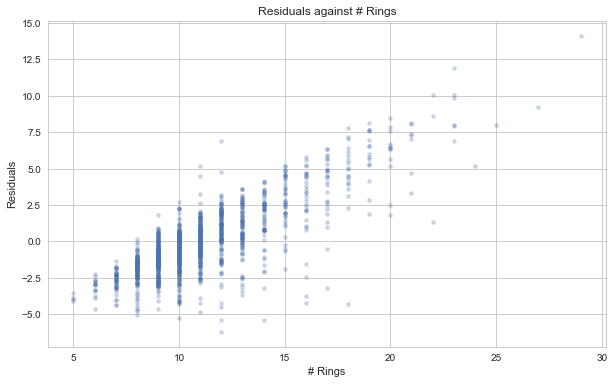

gender: M


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     170.4
Date:                Sun, 21 Jul 2019   Prob (F-statistic):          4.19e-186
Time:                        23:45:33   Log-Likelihood:                -3417.2
No. Observations:                1528   AIC:                             6850.
Df Residuals:                    1520   BIC:                             6893.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.1924      0.566      9.167      0.000       4.081       6.303
Length            -0.0021      0.016     -0.135      0.892      -0.033       0.029
Diameter           0.0253      0.019      1.327      0.185      -0.012       0.063
Height             0.0745      0.017      4.367      0.000       0.041       0.108
Whole weight       0.0433      0.006      7.627      0.000       0.032       0.054
Shucked weight    -0.0940      0.006    -14.916      0.000      -0.106      -0.082
Viscera weight    -0.0508      0.010     -5.085      0.000      -0.070      -0.031
Shell weight       0.0534      0.009      5.997      0.000       0.036       0.071
==============================================================================
Omnibus:                      256.894   Durbin-Watson:                   1.477
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              544.069
Skew:                           0.971   Prob(JB):                    7.19e-119
Kurtosis:                       5.184   Cond. No.                     2.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

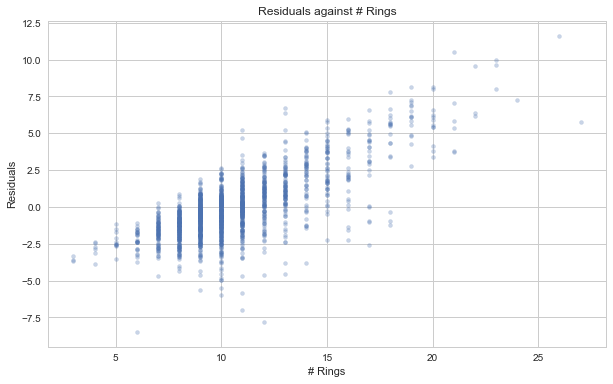

gender: I


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     271.9
Date:                Sun, 21 Jul 2019   Prob (F-statistic):          1.45e-251
Time:                        23:45:33   Log-Likelihood:                -2544.7
No. Observations:                1342   AIC:                             5105.
Df Residuals:                    1334   BIC:                             5147.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.9380      0.311      9.437      0.000       2.327       3.549
Length            -0.0137      0.012     -1.105      0.269      -0.038       0.011
Diameter           0.0297      0.016      1.867      0.062      -0.002       0.061
Height             0.1441      0.018      7.956      0.000       0.109       0.180
Whole weight       0.0411      0.007      5.518      0.000       0.027       0.056
Shucked weight    -0.0733      0.008     -9.005      0.000      -0.089      -0.057
Viscera weight    -0.0564      0.016     -3.517      0.000      -0.088      -0.025
Shell weight       0.0533      0.012      4.579      0.000       0.030       0.076
==============================================================================
Omnibus:                      475.101   Durbin-Watson:                   1.368
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2475.091
Skew:                           1.568   Prob(JB):                         0.00
Kurtosis:                       8.867   Cond. No.                     1.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

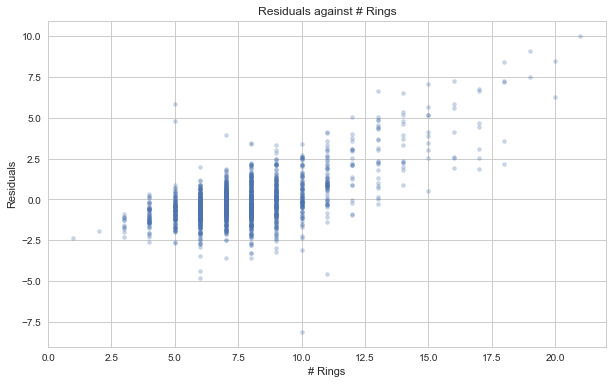

In [96]:
for sex in ['F','M','I']:
    print('gender:',sex)
    X = abalone.loc[abalone['Sex'] == sex,'Length':'Shell weight']
    y = abalone.loc[abalone['Sex'] == sex,'Rings']
    X = sm.add_constant(X)
    model = sm.OLS(y,X).fit()
    display(model.summary())
    figure = plt.figure(figsize=(10, 6))
    axes = figure.add_subplot(1, 1, 1)

    axes.scatter( y,model.resid, alpha = .3,s=16)
    axes.set_ylabel( "Residuals")
    axes.set_xlabel( "# Rings")
    axes.set_title("Residuals against # Rings")

    plt.show()
    plt.close()

When broken out into Sex, the residuals still show the same trend, meaning that the difference in genders might be an intercept difference and not a slope difference. However, it seems like different things are important for each of the genders. For Females, it seems like Height is now not significant. For Males, it seems like both Length and Diameter is now not significant. For Infants, it looks like Length and Diameter are not significant as well.

## Summary

It seems like every variable besides length is important, even when taking the other predictors into account, in predicting the number of rings. This could be because the weight variables are not completely the same, such as an abalone having a heavy shell but light meat or vice versa. It seems like different variables are significant for different genders, indicating there could be a gender difference. 

Of course, there are many things missing in this simple analysis. The first of which is to measure any interaction effects between the terms. For example, Height and Weight could have some sort of interaction that makes one less important in the model. 

Another thing would be to transform the response variable and see if a linear regression would better fit on that model. 